###### Autor: Johnny Rubio Pecasso
###### Fecha: 21/sep/2024
###### Introduccion a la ciencia de datos
###### Notebook Practica 2

# Análisis de Datos de Netflix

Este notebook tiene como objetivo analizar un conjunto de datos de Netflix, aplicando técnicas de extracción de características, reducción de dimensionalidad y selección de características.

In [1]:
import pandas as pd

# Carga de datos
dataset = pd.read_csv('netflix_titles.csv')
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Carga de Datos
En este bloque, se carga el conjunto de datos de Netflix y mostrando las primeras filas para familiarizarnos con su estructura. Este conjunto de datos incluye información sobre títulos de Netflix, como el género, la duración y la fecha de lanzamiento.

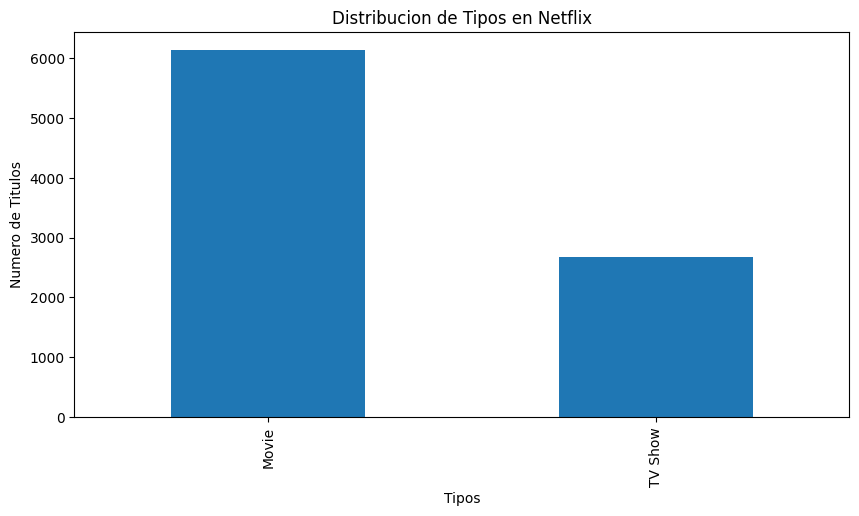

In [2]:
import matplotlib.pyplot as plt

type_counts = dataset['type'].value_counts()
type_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Distribucion de Tipos en Netflix')
plt.xlabel('Tipos')
plt.ylabel('Numero de Titulos')
plt.show()

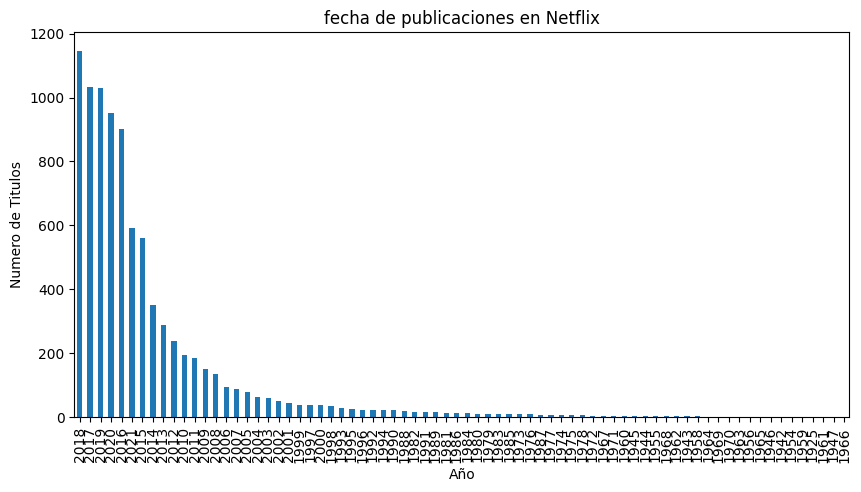

In [3]:
date_counts = dataset['release_year'].value_counts()
date_counts.plot(kind='bar', figsize=(10, 5))
plt.title('fecha de publicaciones en Netflix')
plt.xlabel('Año')
plt.ylabel('Numero de Titulos')
plt.show()

## Extracción de Características
Aquí aplicamos el `TfidfVectorizer` para convertir la columna `listed_in` en una matriz TF-IDF. Esto permite representar los géneros como vectores numéricos, donde las palabras más relevantes tienen mayor peso.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(dataset['listed_in']).toarray()

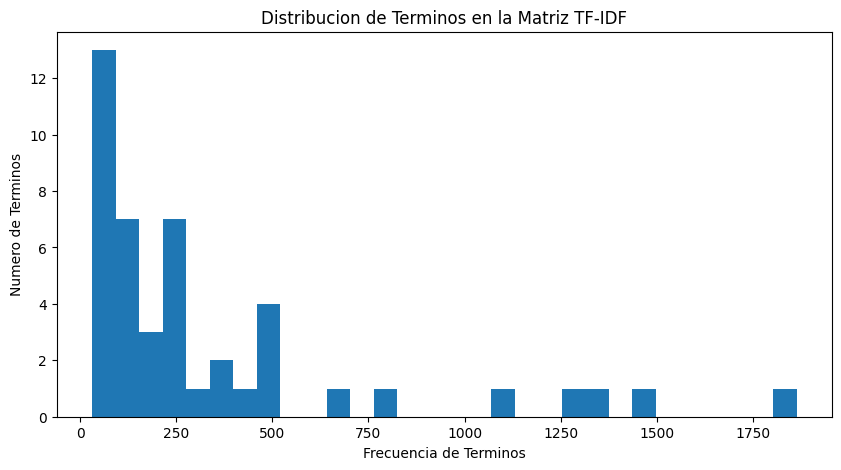

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(X_tfidf.sum(axis=0), bins=30)
plt.title('Distribucion de Terminos en la Matriz TF-IDF')
plt.xlabel('Frecuencia de Terminos')
plt.ylabel('Numero de Terminos')
plt.show()

## Reducción de Dimensionalidad
Utilizando PCA para reducir las dimensiones de nuestra matriz TF-IDF a 20 componentes principales. Esto ayudará a simplificar el modelo y a visualizar mejor los datos.

In [6]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

In [7]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_tfidf)

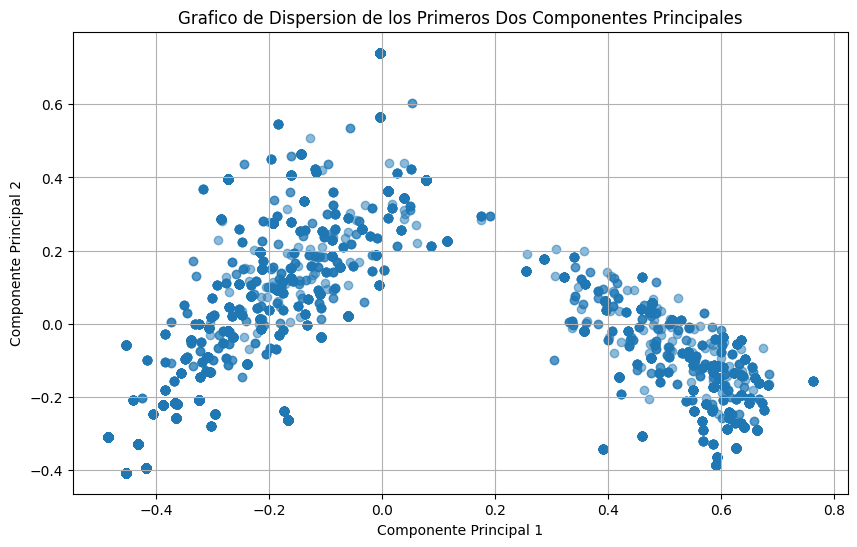

In [8]:
# Grafica de dispersion de los primeros dos componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Grafico de Dispersion de los Primeros Dos Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

c:\pyton38\lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


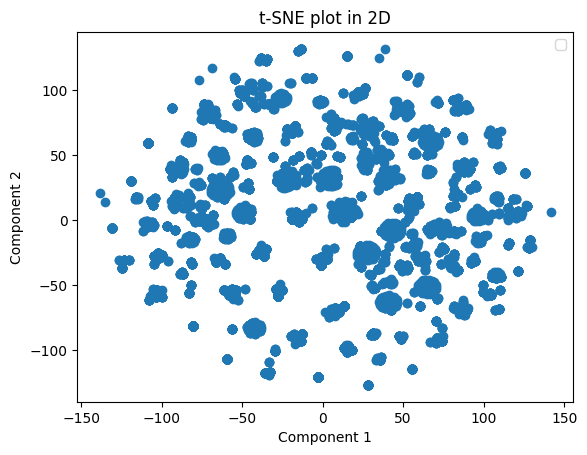

In [9]:
X_TSNE = TSNE(n_components=2).fit_transform(X_tfidf)

scatter = plt.scatter(X_TSNE[:,0], X_TSNE[:,1])
plt.title('t-SNE plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

# Nota:
En esta seccion de la practica se utilizo el metodo de PCA y MNST para sacar las componentes principales, se observa que en este dataset el mejor metodo es PCA.

## Visualización de los Resultados
En este bloque, se muestra un gráfico de dispersión de los dos primeros componentes principales. Esta visualización nos permite observar cómo se distribuyen los datos en el nuevo espacio dimensional reducido.

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Escalar los datos para que sean no negativos
scaler = MinMaxScaler()
X_pca_scaled = scaler.fit_transform(X_pca)
X_TSNE_scaled = scaler.fit_transform(X_TSNE)

y = dataset['listed_in']


# Aplicar Chi-Cuadrado
chi2_selector = SelectKBest(chi2, k=15)
X_kbest_PCA = chi2_selector.fit_transform(X_pca_scaled, y)
# X_kbest_TSNE = chi2_selector.fit_transform(X_TSNE_scaled, y)

## Escalado de Datos y Selección de Características
Primero, se escalan los datos para que todos los valores estén en un rango no negativo. Luego se aplica la prueba Chi-Cuadrado para seleccionar las 15 mejores características que tienen mayor correlación con la variable objetivo.

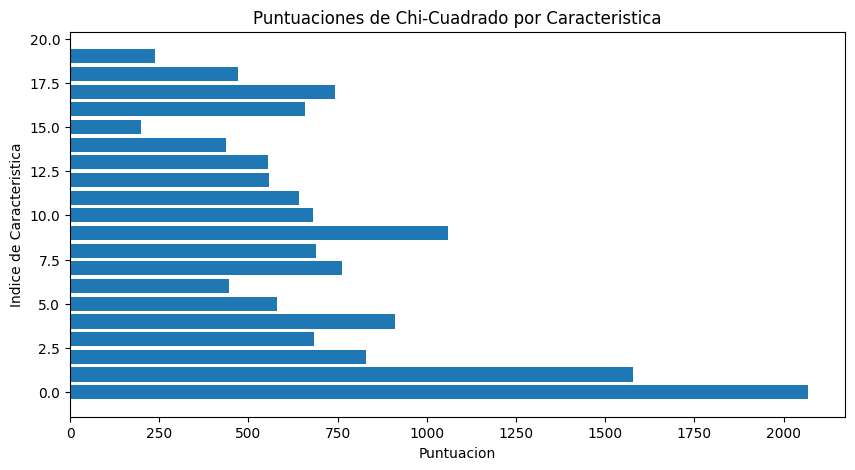

In [11]:
# Mostrar las puntuaciones de Chi-Cuadrado
chi2_scores = chi2_selector.scores_
plt.figure(figsize=(10, 5))
plt.barh(range(len(chi2_scores)), chi2_scores)
plt.title('Puntuaciones de Chi-Cuadrado por Caracteristica')
plt.xlabel('Puntuacion')
plt.ylabel('Indice de Caracteristica')
plt.show()